In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from scipy import linalg

genes = pd.read_csv('gene_expression_s.csv', index_col=0).sort_index(0).sort_index(1)
sample_data = pd.read_csv('sample_info_qc.csv', index_col=0).sort_index(0).sort_index(1)

genes = genes.ix[:, sample_data[sample_data["Pass QC"]].index]
sample_data = sample_data[sample_data["Pass QC"]]

ercc_idx = filter(lambda i: 'ERCC' in i, genes.index)
egenes = genes.drop(ercc_idx)
egenes = egenes.drop('GFP')

egenes = (egenes / egenes.sum()) * 1e6

mask = (egenes > 1).sum(1) > 2
egenes = egenes.ix[mask]

gene_annotation = pd.read_csv('zv9_gene_annotation.txt', sep='\t', index_col=0)
gene_annotation = gene_annotation.ix[egenes.index]

Populating the interactive namespace from numpy and matplotlib


In [9]:
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE

In [8]:
n = 4
ica = FastICA(n, random_state=3984)
Y = ica.fit_transform(np.log10(egenes.T + 1).copy())

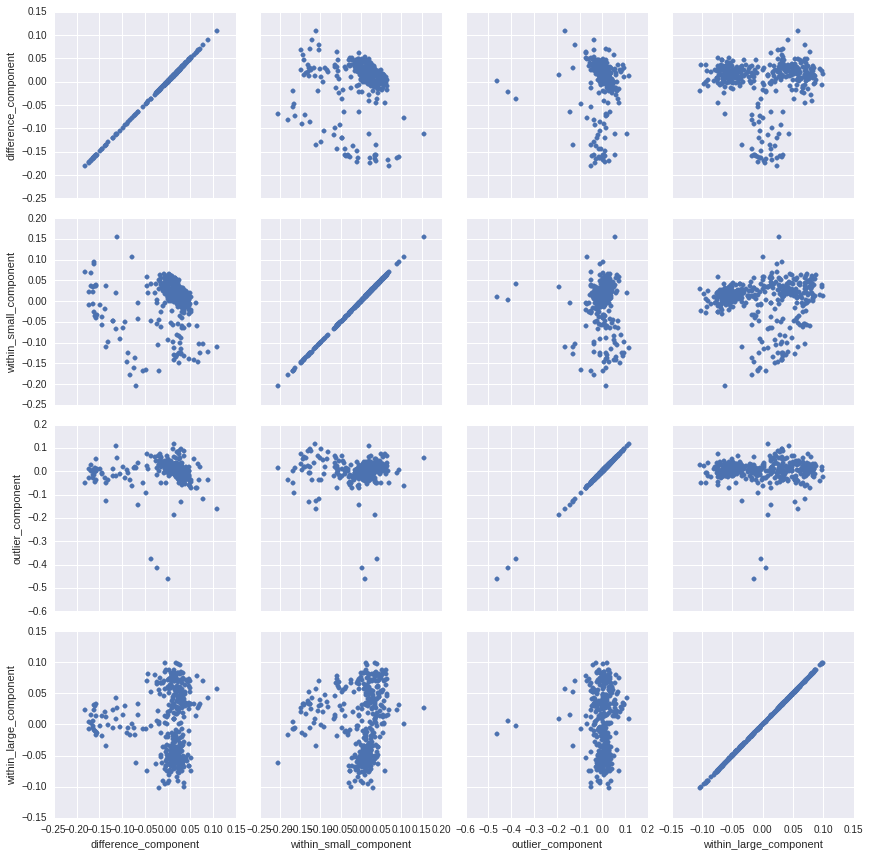

In [10]:
XX = pd.DataFrame(Y, index=egenes.columns)
XX.columns = ['difference_component', 'within_small_component', 'outlier_component', 'within_large_component']
g = sns.PairGrid(XX)
# g.map(plt.scatter, c=np.log10(sample_data['488']))
g.map(plt.scatter, c='k')

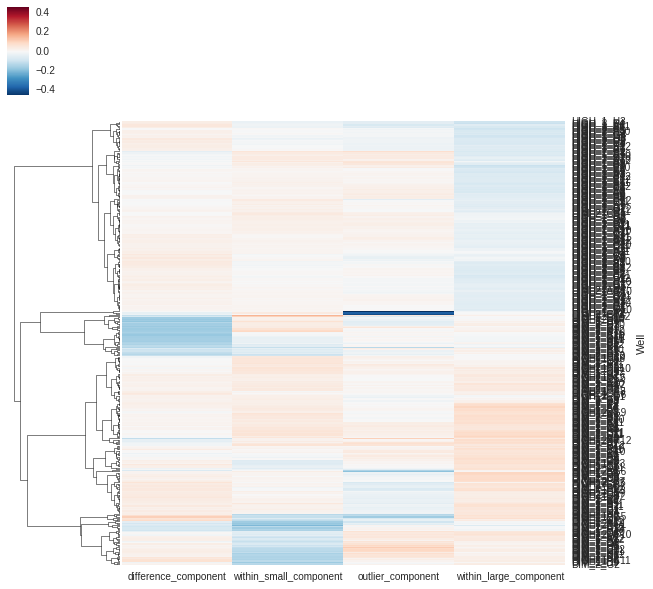

In [11]:
clm = sns.clustermap(XX, method='ward', lw=0, col_cluster=False);

In [12]:
XX.head()

,difference_component,within_small_component,outlier_component,within_large_component
Well,,,,
DIM_1_A1,0.078682,-0.104144,-0.119395,0.070390
DIM_1_A10,0.021386,0.020246,0.017293,0.073285
DIM_1_A11,-0.083068,-0.179175,-0.036702,-0.016871
DIM_1_A12,0.031794,-0.065027,0.034679,0.045065
DIM_1_A2,-0.015701,0.049654,0.072677,0.074522


In [13]:
# Put hidden components in sample data
for component in XX.columns:
    sample_data[component] = XX.ix[sample_data.index, component]

In [14]:
from scipy.cluster.hierarchy import dendrogram

In [15]:
from collections import defaultdict
from matplotlib.colors import rgb2hex, colorConverter 

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

def get_cluster_limits(den):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_limits = Clusters()
    for c in cluster_idxs:
        cluster_limits[c] = (min(cluster_idxs[c]), max(cluster_idxs[c]))
    
    return cluster_limits

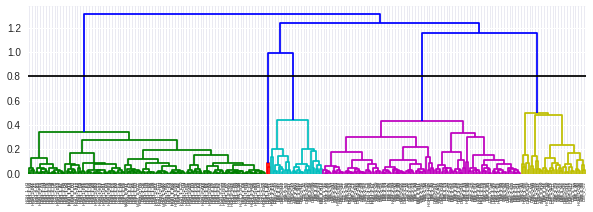

In [16]:
figsize(10, 3)
thr = 0.8
cden = dendrogram(clm.dendrogram_row.linkage, color_threshold=thr, labels=XX.index);
plt.axhline(thr, color='k');
plt.xticks(rotation=90, fontsize=4);

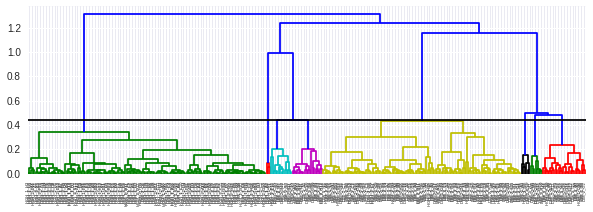

In [17]:
figsize(10, 3)
thr = 0.442
finer_den = dendrogram(clm.dendrogram_row.linkage, color_threshold=thr, labels=XX.index);
plt.axhline(thr, color='k');
plt.xticks(rotation=90, fontsize=4);

In [18]:
clusters = get_cluster_classes(cden)
clusters

y,"['DIM_1_A1', 'HIGH_1_G5', 'DIM_2_D6', 'DIM_1_C9', 'DIM_2_E12', 'DIM_2_D7', 'DIM_1_A11', 'DIM_2_B5', 'DIM_1_H1', 'DIM_1_F1', 'DIM_1_F10', 'DIM_2_A12', 'DIM_1_G11', 'HIGH_2_G1', 'DIM_1_D3', 'HIGH_2_C10', 'DIM_1_H4', 'DIM_1_H10', 'DIM_2_A6', 'DIM_2_F6', 'DIM_1_A12', 'DIM_1_B12', 'DIM_1_F3', 'DIM_2_D9', 'DIM_1_F6', 'DIM_1_G5', 'DIM_2_G7', 'DIM_1_D12', 'DIM_1_G4', 'DIM_2_C8', 'DIM_1_H6', 'DIM_1_H12', 'DIM_2_D5', 'DIM_1_F7', 'DIM_2_H11', 'DIM_2_A2', 'HIGH_1_C11', 'DIM_1_B7', 'DIM_1_A9', 'DIM_1_B9', 'DIM_2_G2', 'DIM_1_H9']"
c,"['DIM_2_C11', 'HIGH_2_F12', 'DIM_1_C10', 'HIGH_2_G7', 'DIM_2_E10', 'DIM_2_G9', 'DIM_2_H10', 'DIM_2_H7', 'DIM_2_H8', 'DIM_2_C7', 'DIM_2_E7', 'DIM_2_B12', 'DIM_2_H1', 'DIM_1_G9', 'DIM_1_E7', 'DIM_2_A11', 'DIM_2_C10', 'DIM_1_H11', 'DIM_2_H5', 'DIM_1_B10', 'DIM_1_G12', 'DIM_2_B10', 'DIM_1_A5', 'DIM_2_C5', 'DIM_1_E12', 'DIM_1_E4', 'DIM_1_B5', 'DIM_2_F10', 'DIM_2_E1', 'DIM_2_E3', 'DIM_1_B4', 'DIM_2_G3', 'DIM_2_H12', 'DIM_1_D8']"
r,"['HIGH_1_A2', 'HIGH_1_F2', 'HIGH_1_B9']"
m,"['DIM_1_H8', 'HIGH_1_A8', 'DIM_1_D7', 'DIM_1_E9', 'DIM_2_E5', 'DIM_2_G10', 'DIM_1_E11', 'DIM_1_H3', 'DIM_2_A7', 'DIM_1_C12', 'DIM_1_D9', 'DIM_1_C2', 'HIGH_1_B10', 'DIM_2_B11', 'DIM_1_C7', 'DIM_1_D2', 'DIM_2_D12', 'DIM_2_F9', 'HIGH_1_C6', 'DIM_2_B2', 'DIM_1_C1', 'DIM_1_G2', 'DIM_1_G8', 'DIM_2_D2', 'DIM_2_E9', 'DIM_2_B8', 'DIM_2_G12', 'DIM_2_A10', 'DIM_2_D8', 'HIGH_1_G6', 'HIGH_1_C8', 'DIM_2_F7', 'HIGH_2_C7', 'HIGH_2_E1', 'DIM_1_C6', 'DIM_2_C9', 'DIM_1_B8', 'DIM_2_D3', 'DIM_1_C6', 'DIM_2_E2', 'DIM_2_E4', 'DIM_2_C2', 'DIM_1_E6', 'DIM_1_F5', 'DIM_1_A7', 'DIM_2_F3', 'DIM_2_A3', 'DIM_2_B9', 'DIM_1_H2', 'DIM_1_E10', 'DIM_1_E8', 'DIM_2_C3', 'DIM_2_B3', 'HIGH_2_G9', 'DIM_2_B1', 'DIM_2_A8', 'DIM_2_F1', 'DIM_1_C11', 'DIM_1_F9', 'DIM_2_G6', 'DIM_1_G1', 'DIM_1_A6', 'DIM_1_F4', 'DIM_1_D11', 'DIM_2_F11', 'DIM_2_G11', 'DIM_1_D5', 'DIM_2_H9', 'DIM_1_B2', 'HIGH_2_H12', 'DIM_1_A2', 'DIM_2_F2', 'DIM_2_B7', 'DIM_1_A8', 'DIM_2_C12', 'DIM_2_D1', 'DIM_1_A10', 'DIM_1_F11', 'DIM_1_B1', 'DIM_1_G10', 'DIM_1_E3', 'DIM_2_A4', 'DIM_2_F5', 'DIM_1_D6', 'DIM_2_G4', 'DIM_1_F2', 'DIM_1_E2', 'DIM_2_E8', 'DIM_2_G5', 'DIM_1_C3', 'DIM_1_G6', 'HIGH_1_E3', 'DIM_2_D11', 'DIM_2_F4', 'DIM_2_A1', 'HIGH_2_G6', 'DIM_1_B6', 'DIM_1_F8', 'DIM_1_C5', 'DIM_2_H6', 'DIM_1_G3', 'DIM_2_C4', 'DIM_1_A3', 'HIGH_2_B7', 'DIM_1_G3', 'DIM_2_F8', 'DIM_2_G8', 'HIGH_2_F3', 'DIM_1_E1', 'DIM_2_F12', 'DIM_2_B6', 'HIGH_2_H6', 'DIM_1_H5', 'HIGH_2_A7', 'HIGH_1_H8', 'DIM_2_C1', 'HIGH_1_B2', 'DIM_2_H3', 'DIM_1_G7', 'DIM_2_B4', 'DIM_2_E6', 'DIM_1_B3', 'DIM_1_B11', 'DIM_2_H2', 'DIM_1_H7', 'DIM_2_G1', 'DIM_2_E11', 'DIM_1_C4', 'DIM_2_H4', 'DIM_1_D1', 'DIM_1_E5']"
g,"['HIGH_1_H3', 'HIGH_2_F4', 'HIGH_1_A6', 'HIGH_2_E11', 'HIGH_1_H1', 'HIGH_2_A6', 'HIGH_2_F6', 'HIGH_2_A3', 'HIGH_2_F10', 'HIGH_2_F9', 'HIGH_2_G4', 'HIGH_1_G4', 'HIGH_1_H4', 'HIGH_2_G4', 'HIGH_1_F1', 'HIGH_2_G3', 'HIGH_2_C9', 'HIGH_2_H8', 'HIGH_2_C8', 'HIGH_2_H5', 'HIGH_1_F4', 'HIGH_2_E12', 'HIGH_1_A7', 'HIGH_2_B6', 'HIGH_1_B7', 'HIGH_1_A4', 'HIGH_1_E10', 'HIGH_1_H2', 'HIGH_1_A10', 'HIGH_1_H7', 'HIGH_1_D2', 'HIGH_2_E10', 'HIGH_1_A9', 'HIGH_1_C3', 'HIGH_2_A12', 'HIGH_2_H2', 'HIGH_1_B1', 'HIGH_1_F10', 'HIGH_1_D8', 'HIGH_1_E4', 'HIGH_1_H5', 'HIGH_2_E3', 'HIGH_1_E6', 'HIGH_1_A3', 'HIGH_1_B4', 'HIGH_2_D8', 'HIGH_2_B12', 'HIGH_2_E8', 'HIGH_1_E12', 'HIGH_2_E2', 'HIGH_1_E11', 'HIGH_2_E9', 'HIGH_1_E1', 'HIGH_1_B12', 'HIGH_2_C3', 'HIGH_2_H1', 'HIGH_1_E5', 'HIGH_2_A8', 'HIGH_2_F8', 'HIGH_1_D3', 'HIGH_2_F1', 'HIGH_1_H9', 'HIGH_2_F5', 'HIGH_2_B9', 'HIGH_1_C9', 'HIGH_2_F7', 'HIGH_2_F11', 'HIGH_1_A1', 'HIGH_2_D7', 'HIGH_2_D6', 'HIGH_2_D12', 'HIGH_2_H11', 'HIGH_1_G2', 'HIGH_1_D12', 'HIGH_2_B8', 'DIM_2_C6', 'HIGH_1_H6', 'HIGH_1_C5', 'HIGH_1_D9', 'HIGH_1_G3', 'HIGH_1_D6', 'HIGH_1_G8', 'HIGH_1_B6', 'HIGH_2_D2', 'HIGH_1_F9', 'HIGH_2_B11', 'HIGH_1_H11', 'HIGH_2_E4', 'HIGH_2_G11', 'HIGH_1_B11', 'HIGH_1_D1', 'HIGH_1_H10', 'HIGH_1_A5', 'HIGH_1_C4', 'HIGH_1_F3', 'HIGH_1_A11', 'HIGH_1_D5', 'HIGH_2_D11', 'HIGH_1_G12', 'HIGH_2_A2', 'HIGH_1_B5', 'HIGH_1_C10', 'HIGH_1_D11', 'HIGH_2_C4', 'HI

In [19]:
finer_clusters = get_cluster_classes(finer_den)
finer_clusters

c,"['DIM_2_C11', 'HIGH_2_F12', 'DIM_1_C10', 'HIGH_2_G7', 'DIM_2_E10', 'DIM_2_G9', 'DIM_2_H10', 'DIM_2_H7', 'DIM_2_H8', 'DIM_2_C7', 'DIM_2_E7', 'DIM_2_B12', 'DIM_2_H1', 'DIM_1_G9']"
g,"['HIGH_1_H3', 'HIGH_2_F4', 'HIGH_1_A6', 'HIGH_2_E11', 'HIGH_1_H1', 'HIGH_2_A6', 'HIGH_2_F6', 'HIGH_2_A3', 'HIGH_2_F10', 'HIGH_2_F9', 'HIGH_2_G4', 'HIGH_1_G4', 'HIGH_1_H4', 'HIGH_2_G4', 'HIGH_1_F1', 'HIGH_2_G3', 'HIGH_2_C9', 'HIGH_2_H8', 'HIGH_2_C8', 'HIGH_2_H5', 'HIGH_1_F4', 'HIGH_2_E12', 'HIGH_1_A7', 'HIGH_2_B6', 'HIGH_1_B7', 'HIGH_1_A4', 'HIGH_1_E10', 'HIGH_1_H2', 'HIGH_1_A10', 'HIGH_1_H7', 'HIGH_1_D2', 'HIGH_2_E10', 'HIGH_1_A9', 'HIGH_1_C3', 'HIGH_2_A12', 'HIGH_2_H2', 'HIGH_1_B1', 'HIGH_1_F10', 'HIGH_1_D8', 'HIGH_1_E4', 'HIGH_1_H5', 'HIGH_2_E3', 'HIGH_1_E6', 'HIGH_1_A3', 'HIGH_1_B4', 'HIGH_2_D8', 'HIGH_2_B12', 'HIGH_2_E8', 'HIGH_1_E12', 'HIGH_2_E2', 'HIGH_1_E11', 'HIGH_2_E9', 'HIGH_1_E1', 'HIGH_1_B12', 'HIGH_2_C3', 'HIGH_2_H1', 'HIGH_1_E5', 'HIGH_2_A8', 'HIGH_2_F8', 'HIGH_1_D3', 'HIGH_2_F1', 'HIGH_1_H9', 'HIGH_2_F5', 'HIGH_2_B9', 'HIGH_1_C9', 'HIGH_2_F7', 'HIGH_2_F11', 'HIGH_1_A1', 'HIGH_2_D7', 'HIGH_2_D6', 'HIGH_2_D12', 'HIGH_2_H11', 'HIGH_1_G2', 'HIGH_1_D12', 'HIGH_2_B8', 'DIM_2_C6', 'HIGH_1_H6', 'HIGH_1_C5', 'HIGH_1_D9', 'HIGH_1_G3', 'HIGH_1_D6', 'HIGH_1_G8', 'HIGH_1_B6', 'HIGH_2_D2', 'HIGH_1_F9', 'HIGH_2_B11', 'HIGH_1_H11', 'HIGH_2_E4', 'HIGH_2_G11', 'HIGH_1_B11', 'HIGH_1_D1', 'HIGH_1_H10', 'HIGH_1_A5', 'HIGH_1_C4', 'HIGH_1_F3', 'HIGH_1_A11', 'HIGH_1_D5', 'HIGH_2_D11', 'HIGH_1_G12', 'HIGH_2_A2', 'HIGH_1_B5', 'HIGH_1_C10', 'HIGH_1_D11', 'HIGH_2_C4', 'HIGH_1_B5', 'HIGH_1_F11', 'HIGH_2_H3', 'HIGH_1_D7', 'HIGH_2_A11', 'HIGH_2_D1', 'HIGH_1_F5', 'HIGH_2_G8', 'HIGH_2_D3', 'HIGH_2_A4', 'HIGH_2_D9', 'HIGH_1_E9', 'HIGH_2_A10', 'HIGH_2_A5', 'HIGH_1_E8', 'HIGH_2_B1', 'HIGH_2_A9', 'HIGH_2_C12', 'HIGH_2_D5', 'HIGH_2_E7', 'HIGH_1_F6', 'HIGH_2_B2', 'HIGH_2_B5', 'HIGH_2_C11', 'HIGH_2_G2', 'HIGH_2_F2', 'HIGH_1_E8', 'HIGH_1_F12', 'HIGH_2_H7', 'HIGH_1_E7', 'HIGH_2_H10', 'HIGH_1_C2', 'HIGH_2_G12', 'HIGH_2_B4', 'HIGH_2_H4', 'HIGH_2_G5', 'HIGH_2_B3', 'HIGH_1_G10', 'HIGH_2_C6', 'DIM_2_A5', 'HIGH_1_G11', 'HIGH_1_G9', 'HIGH_1_B8', 'HIGH_1_C1', 'HIGH_1_H12', 'HIGH_2_C2', 'HIGH_1_B3', 'HIGH_2_B10', 'HIGH_2_H9', 'HIGH_1_G7', 'HIGH_2_C1', 'HIGH_1_G1', 'HIGH_2_C5', 'HIGH_2_G10', 'DIM_1_A11', 'DIM_2_B5', 'DIM_1_H1', 'DIM_1_F1', 'DIM_1_F10', 'DIM_2_A12', 'DIM_1_G11', 'HIGH_2_G1']"
k,"['DIM_1_A1', 'HIGH_1_G5', 'DIM_2_D6', 'DIM_1_C9', 'DIM_2_E12', 'DIM_2_D7']"
m,"['DIM_1_E7', 'DIM_2_A11', 'DIM_2_C10', 'DIM_1_H11', 'DIM_2_H5', 'DIM_1_B10', 'DIM_1_G12', 'DIM_2_B10', 'DIM_1_A5', 'DIM_2_C5', 'DIM_1_E12', 'DIM_1_E4', 'DIM_1_B5', 'DIM_2_F10', 'DIM_2_E1', 'DIM_2_E3', 'DIM_1_B4', 'DIM_2_G3', 'DIM_2_H12', 'DIM_1_D8']"
r,"['HIGH_1_A2', 'HIGH_1_F2', 'HIGH_1_B9', 'DIM_1_D3', 'HIGH_2_C10', 'DIM_1_H4', 'DIM_1_H10', 'DIM_2_A6', 'DIM_2_F6', 'DIM_1_A12', 'DIM_1_B12', 'DIM_1_F3', 'DIM_2_D9', 'DIM_1_F6', 'DIM_1_G5', 'DIM_2_G7', 'DIM_1_D12', 'DIM_1_G4', 'DIM_2_C8', 'DIM_1_H6', 'DIM_1_H12', 'DIM_2_D5', 'DIM_1_F7', 'DIM_2_H11', 'DIM_2_A2', 'HIGH_1_C11', 'DIM_1_B7', 'DIM_1_A9', 'DIM_1_B9', 'DIM_2_G2', 'DIM_1_H9']"
y,"['DIM_1_H8', 'HIGH_1_A8', 'DIM_1_D7', 'DIM_1_E9', 'DIM_2_E5', 'DIM_2_G10', 'DIM_1_E11', 'DIM_1_H3', 'DIM_2_A7', 'DIM_1_C12', 'DIM_1_D9', 'DIM_1_C2', 'HIGH_1_B10', 'DIM_2_B11', 'DIM_1_C7', 'DIM_1_D2', 'DIM_2_D12', 'DIM_2_F9', 'HIGH_1_C6', 'DIM_2_B2', 'DIM_1_C1', 'DIM_1_G2', 'DIM_1_G8', 'DIM_2_D2', 'DIM_2_E9', 'DIM_2_B8', 'DIM_2_G12', 'DIM_2_A10', 'DIM_2_D8', 'HIGH_1_G6', 'HIGH_1_C8', 'DIM_2_F7', 'HIGH_2_C7', 'HIGH_2_E1', 'DIM_1_C6', 'DIM_2_C9', 'DIM_1_B8', 'DIM_2_D3', 'DIM_1_C6', 'DIM_2_E2', 'DIM_2_E4', 'DIM_2_C2', 'DIM_1_E6', 'DIM_1_F5', 'DIM_1_A7', 'DIM_2_F3', 'DIM_2_A3', 'DIM_2_B9', 'DIM_1_H2', 'DIM_1_E10', 'DIM_1_E8', 'DIM_2_C3', 'DIM_2_B3', 'HIGH_2_G9', 'DIM_2_B1', 'DIM_2_A8', 'DIM_2_F1', 'DIM_1_C11', 'DIM_1_F9', 'DIM_2_G6', 'DIM_1_G1', 'DIM_1_A6', 'DIM_1_F4', 'DIM_1_D11', 'DIM_2_F11', 'DIM_2_G11', 'DIM_1_D5', 'DIM_2_H9', 'DIM_1_B2', 'HIGH_2_H12', 'DIM_1_A2', 'DIM_2_F2', 'DIM_2_B

In [20]:
cell_color = []
for cell in XX.index:
    for color in clusters:
        if cell in clusters[color]:
            cell_color.append(color)
            break

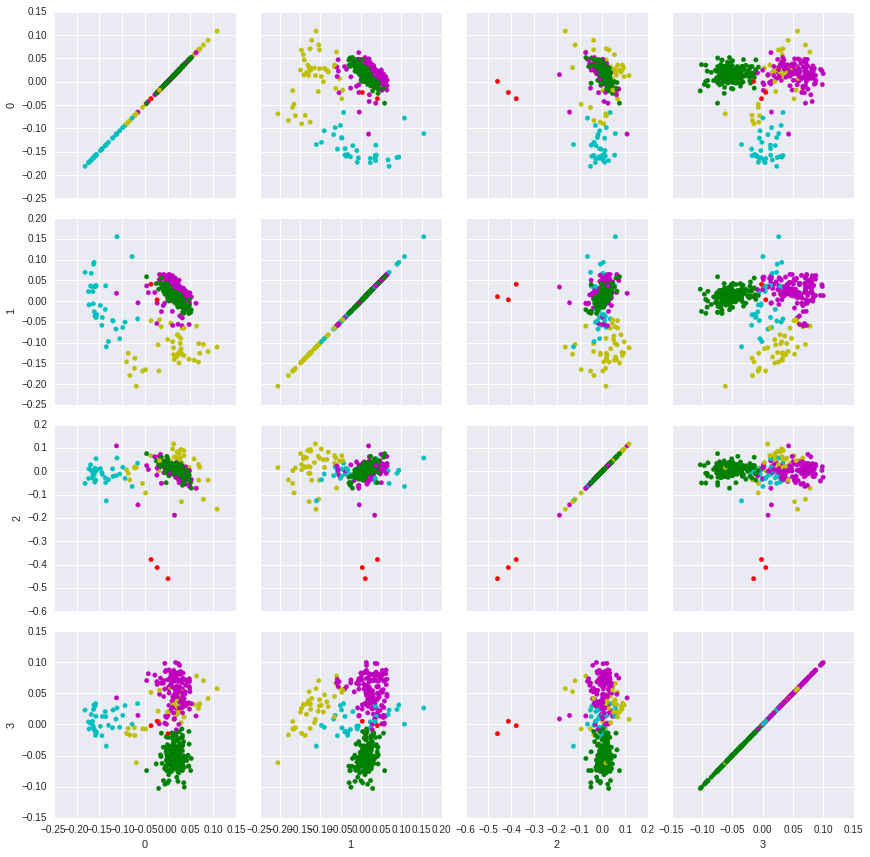

In [21]:
XX = pd.DataFrame(Y, index=egenes.columns)
g = sns.PairGrid(XX)
g.map(plt.scatter, color=cell_color)

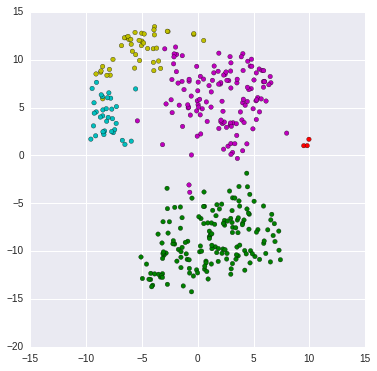

In [22]:
figsize(6, 6)

sm_ica = TSNE(n_components=2, perplexity=75, random_state=254)

XX2 = sm_ica.fit_transform(XX.copy())
XX2 = pd.DataFrame(XX2, index=XX.index)
plt.scatter(XX2[0], XX2[1], c=cell_color);

In [23]:
finer_cell_color = []
for cell in XX.index:
    for color in finer_clusters:
        if cell in finer_clusters[color]:
            finer_cell_color.append(color)
            break

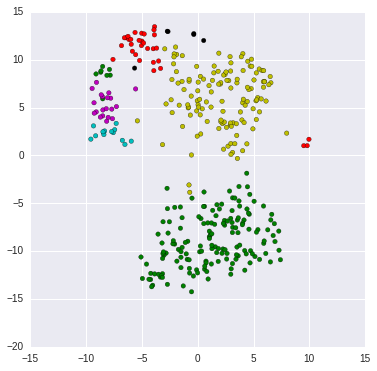

In [24]:
figsize(6, 6)

sm_ica = TSNE(n_components=2, perplexity=75, random_state=254)

XX2 = sm_ica.fit_transform(XX.copy())
XX2 = pd.DataFrame(XX2, index=XX.index)
plt.scatter(XX2[0], XX2[1], c=finer_cell_color);

In [25]:
named_clusters = {}

In [26]:
named_clusters['1a'] = finer_clusters['c']
named_clusters['1b'] = finer_clusters['m']
named_clusters['2'] = clusters['y']
named_clusters['3'] = clusters['m']
named_clusters['4'] = clusters['g']
named_clusters['x'] = clusters['r']

In [27]:
cl_plt = sns.color_palette("Set2", 5)
named_cluster_colors = {'1a' : cl_plt[0],
                        '1b' : cl_plt[1],
                        '2' : cl_plt[2],
                        '3' : cl_plt[3],
                        '4' : cl_plt[4],
                        'x' : (0.8, 0.8, 0.8)}

In [28]:
cell_cluster = []
for cell in sample_data.index:
    for cluster in named_clusters:
        if cell in named_clusters[cluster]:
            cell_cluster.append(cluster)
            break

In [29]:
sample_data['cluster'] = cell_cluster

In [30]:
sample_data.groupby('cluster').size()

cluster
1a     14
1b     20
2      42
3     129
4     155
x       3
dtype: int64

In [31]:
sample_data['cluster_color'] = sample_data['cluster'].map(named_cluster_colors)

In [32]:
sample_data['tsne_0'] = XX2[0][sample_data.index]
sample_data['tsne_1'] = XX2[1][sample_data.index]

In [33]:
s_d_mean = sample_data.query('cluster != "x"').groupby('cluster').mean()

In [34]:
s_d_first = sample_data.query('cluster != "x"').groupby('cluster').first()

In [35]:
sample_data.condition.value_counts()

DIM     184
HIGH    179
dtype: int64

In [36]:
sample_data['condition_color'] = ['#31a354' if c == 'HIGH' else '#e5f5e0' for c in sample_data['condition']]

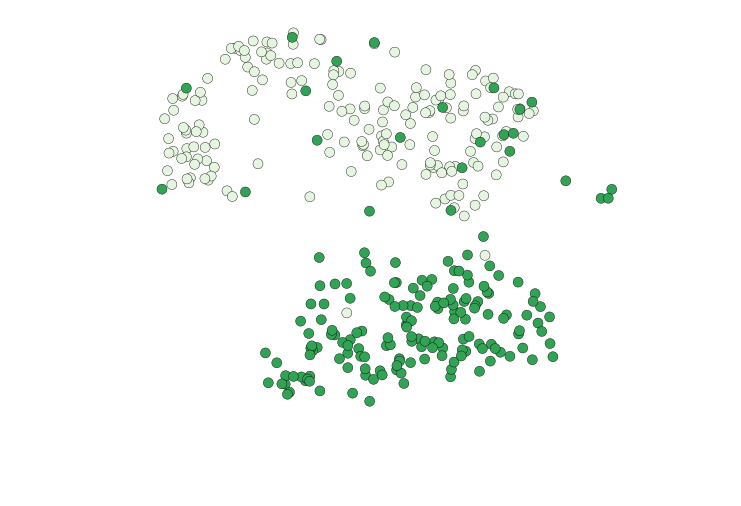

In [39]:
sns.set_style('white')
sns.set_context('talk')

plt.scatter(sample_data['tsne_0'], sample_data['tsne_1'],
            color=sample_data['condition_color'],
            s=100, edgecolor='k');

plt.axis('off');
plt.tight_layout();
plt.savefig('figures/tsne_dim_bright.pdf')

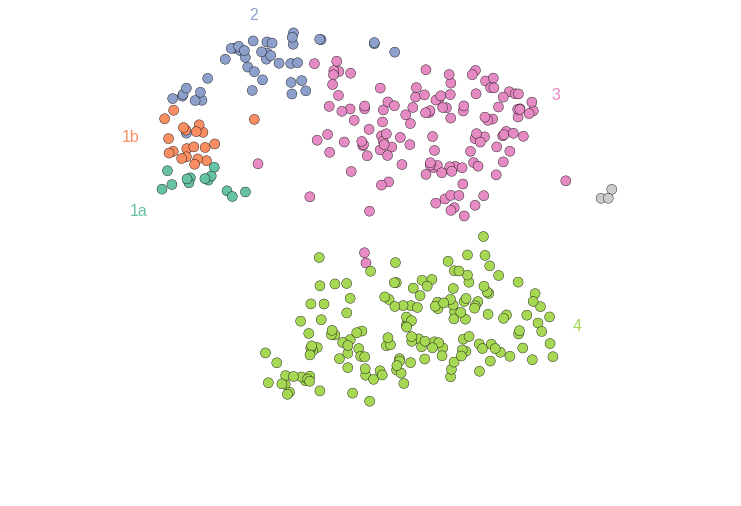

In [40]:
sns.set_style('white')
sns.set_context('talk')

plt.scatter(sample_data['tsne_0'], sample_data['tsne_1'],
            color=sample_data['cluster_color'],
            s=100, edgecolor='k');

# plt.plot(s_d_mean['tsne_0'], s_d_mean['tsne_1'],
#          alpha=0.075,
#          color='k',
#          zorder=0,
#          lw=20,
#          )

plt.text(s_d_mean['tsne_0']['1a'] - 3,
         s_d_mean['tsne_1']['1a'] - 2.5,
         '1a',
         color=s_d_first.cluster_color['1a'],
         size=16
         )

plt.text(s_d_mean['tsne_0']['1b'] - 3,
         s_d_mean['tsne_1']['1b'] - 0,
         '1b',
         color=s_d_first.cluster_color['1b'],
         size=16
         )

plt.text(s_d_mean['tsne_0']['2'] - 0.5,
         s_d_mean['tsne_1']['2'] + 3.5,
         '2',
         color=s_d_first.cluster_color['2'],
         size=16
         )

plt.text(s_d_mean['tsne_0']['3'] + 5.3,
         s_d_mean['tsne_1']['3'] + 2.5,
         '3',
         color=s_d_first.cluster_color['3'],
         size=16
         )

plt.text(s_d_mean['tsne_0']['4'] + 7,
         s_d_mean['tsne_1']['4'],
         '4',
         color=s_d_first.cluster_color['4'],
         size=16
         )

plt.axis('off');
plt.tight_layout();
plt.savefig('figures/tsne_clusters.pdf')

In [41]:
comp_cols = filter(lambda n: '_component' in n, sample_data.columns)

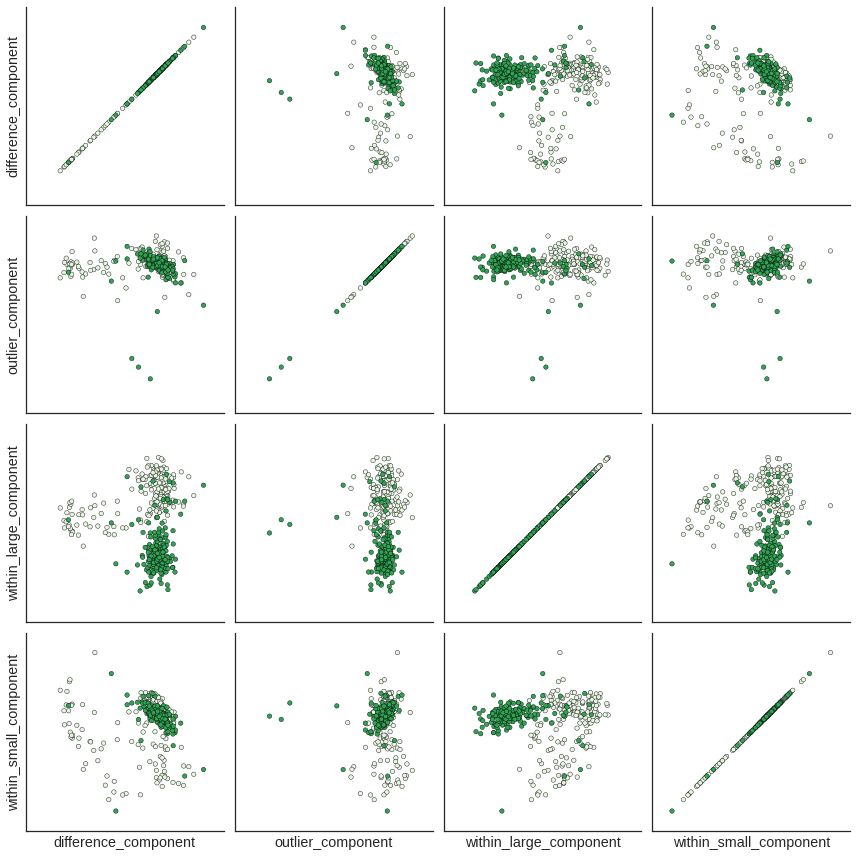

In [42]:
g = sns.PairGrid(sample_data[comp_cols])
g.map(plt.scatter, color=sample_data['condition_color'], edgecolor='k')
for ax in g.axes.flatten():
    ax.set_xticks([]);
    ax.set_yticks([]);
    
plt.tight_layout()
plt.savefig('figures/ica_condition.pdf');

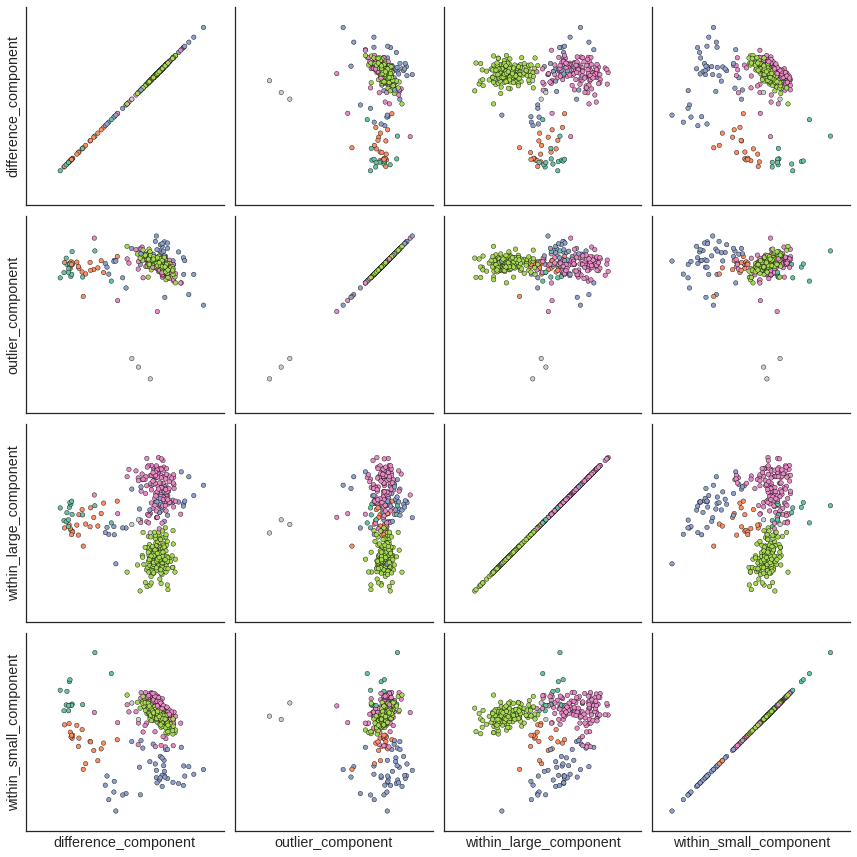

In [43]:
g = sns.PairGrid(sample_data[comp_cols])
g.map(plt.scatter, color=sample_data['cluster_color'], edgecolor='k')
for ax in g.axes.flatten():
    ax.set_xticks([]);
    ax.set_yticks([]);
    
plt.tight_layout()
plt.savefig('figures/ica_clusters.pdf');

In [44]:
sample_data.groupby('cluster').mean()['within_small_component']

cluster
1a    0.060395
1b   -0.046327
2    -0.117113
3     0.024518
4     0.011498
x     0.018242
Name: within_small_component, dtype: float64

In [45]:
sample_data.groupby('cluster').mean()['488']

cluster
1a     185.000000
1b      86.600000
2      140.642857
3      180.596899
4     1446.845161
x     1261.000000
Name: 488, dtype: float64

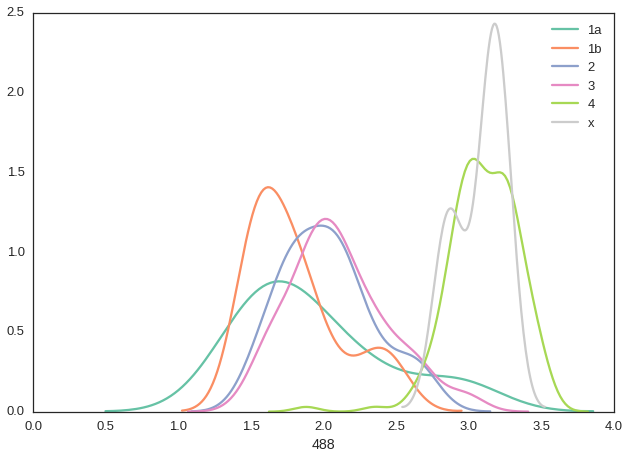

In [46]:
for clid in sorted(sample_data['cluster'].unique()):
    gfp_flourenscence = sample_data.query('cluster == "{}"'.format(clid))['488']
    sns.distplot(np.log10(gfp_flourenscence),
                 color=sample_data['cluster_color'][gfp_flourenscence.index[0]],
                 hist=False,
                 label=clid)

plt.legend();

>Variation in cell size properties as projected through FSC is expected to be small, for example, the smallest cell are approximately 6-7 micron while the largest can reach no more than 10 times that size, This can be easily represented in a linear scale.
The same goes for SSC which changes mainly as result of the granules size and numbers.
Fluorescence however can change in many folds and thus is necessary to present in log scale. 
Having said that, switching between logs and linear scales, is possible and the log linear scales you describe are only the default software choice. 

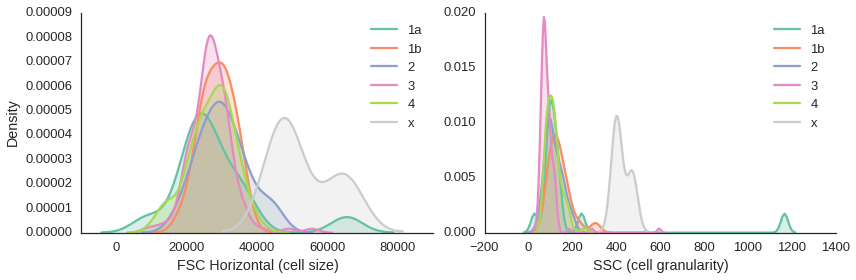

In [62]:
figsize(12, 4)

plt.subplot(1, 2, 1)
for clid in sorted(sample_data['cluster'].unique()):
    gfp_flourenscence = sample_data.query('cluster == "{}"'.format(clid))['FSC Horizontal']
    sns.distplot(gfp_flourenscence,
                 color=sample_data['cluster_color'][gfp_flourenscence.index[0]],
                 kde_kws={'shade': True},
                 hist=False,
                 label=clid)

plt.xlabel('FSC Horizontal (cell size)')
plt.ylabel('Density')
    
plt.subplot(1, 2, 2)
for clid in sorted(sample_data['cluster'].unique()):
    gfp_flourenscence = sample_data.query('cluster == "{}"'.format(clid))['SSC']
    sns.distplot(gfp_flourenscence,
                 color=sample_data['cluster_color'][gfp_flourenscence.index[0]],
                 kde_kws={'shade': True},
                 hist=False,
                 label=clid)
    
plt.xlabel('SSC (cell granularity)')

sns.despine()
plt.legend();

plt.tight_layout();
plt.savefig('figures/clusters_FSC_SSC.pdf')

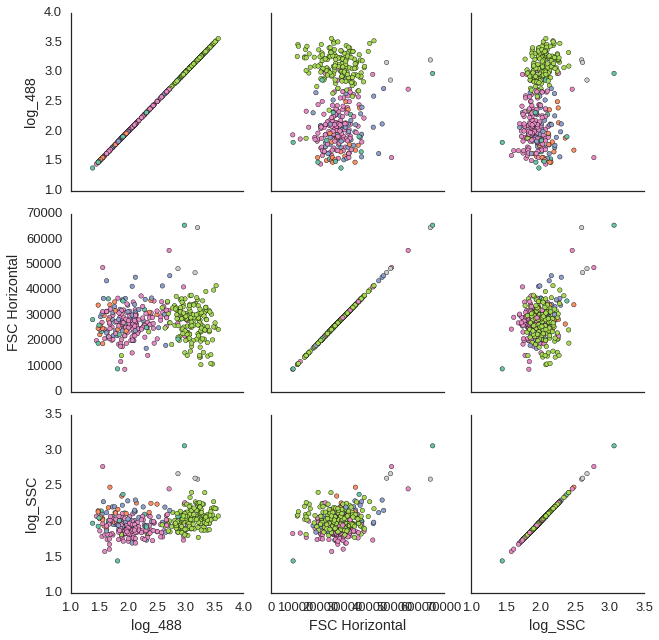

In [49]:
sample_data['log_488'] = np.log10(sample_data['488'])
sample_data['log_SSC'] = np.log10(sample_data['SSC'])
g = sns.PairGrid(sample_data[['log_488', 'FSC Horizontal', 'log_SSC']])
g.map(plt.scatter, color=sample_data['cluster_color'], edgecolor='k')

In [97]:
sample_data.to_csv('sample_info_qc.csv')

### Expression of thrombocyte markers in outliers

In [73]:
# fli1a
egenes.ix['ENSDARG00000054632', sample_data.query('cluster == "x"').index]

Well
HIGH_1_A2      4.419297
HIGH_1_B9      0.000000
HIGH_1_F2    293.519183
Name: ENSDARG00000054632, dtype: float64

In [74]:
# gata1a
egenes.ix['ENSDARG00000013477', sample_data.query('cluster == "x"').index]

Well
HIGH_1_A2     0.000000
HIGH_1_B9    72.077552
HIGH_1_F2     3.307692
Name: ENSDARG00000013477, dtype: float64

In [75]:
# gf1b
egenes.ix['ENSDARG00000079947', sample_data.query('cluster == "x"').index]

Well
HIGH_1_A2    3.472622
HIGH_1_B9    0.000000
HIGH_1_F2    0.000000
Name: ENSDARG00000079947, dtype: float64

In [76]:
# gp1bb
egenes.ix['ENSDARG00000074441', sample_data.query('cluster == "x"').index]

Well
HIGH_1_A2    30.445790
HIGH_1_B9    33.947207
HIGH_1_F2    14.675405
Name: ENSDARG00000074441, dtype: float64

In [77]:
# itga3b
egenes.ix['ENSDARG00000012824', sample_data.query('cluster == "x"').index]

Well
HIGH_1_A2    0
HIGH_1_B9    0
HIGH_1_F2    0
Name: ENSDARG00000012824, dtype: float64